In [ ]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
#csv1
url = 'https://raw.githubusercontent.com/cindym02/hants-506/main/SEER%20Breast%20Cancer%20Dataset%20%20(1).csv'
df = pd.read_csv(url)
df

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [ ]:
#1.Potential DV/IV 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [ ]:
for var in df.columns: 
    print(var)

Age
Race 
Marital Status
Unnamed: 3
T Stage 
N Stage
6th Stage
Grade
A Stage
Tumor Size
Estrogen Status
Progesterone Status
Regional Node Examined
Reginol Node Positive
Survival Months
Status


Potential independent variables: Age, tumor size, size of regional node, estrogen status

Dependent Variables: Survival months, status (mortality)

In [ ]:
#2.Missing Data
df.isnull()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4020,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4021,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4022,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [ ]:
# The only missing data values within this dataset lies under the "unnamed: 3" column. This variable will be dropped since all reported values are NaN.
df.drop(['Unnamed: 3'], axis=1, inplace=True)

In [ ]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [ ]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [ ]:
#3a.Transformation on tumor size
#Breast cancer tumors over 20 millimeters in size are generally classified as larger tumors.
#This classification guideline is based on Narod's cohort study referenced in the paper.
for idx, row in df.iterrows():
  if row['Tumor Size'] >= 20:
    df.loc[idx, 'Tumor Size_description'] = 'Large'
  else:
    df.loc[idx, 'Tumor Size_description'] = 'Small'
df[['Tumor Size', 'Tumor Size_description']]

,Tumor Size,Tumor Size_description
0,40,Large
1,45,Large
2,25,Large
3,19,Small
4,35,Large
...,...,...
4019,10,Small
4020,9,Small
4021,9,Small
4022,9,Small


In [ ]:
#3b.Transformation on age and likelihood of onset of menopause (average menopause age is 51)
def rules(row):
  if row['Age'] >= 51:
    return 'Menopausal'
  elif row['Age'] < 51:
    return 'Premenopausal'
df['Menopausal_likelihood'] = df.apply(rules,1)
df[['Age', 'Menopausal_likelihood']]

,Age,Menopausal_likelihood
0,43,Premenopausal
1,47,Premenopausal
2,67,Menopausal
3,46,Premenopausal
4,63,Menopausal
...,...,...
4019,52,Menopausal
4020,53,Menopausal
4021,53,Menopausal
4022,60,Menopausal


In [ ]:
#Transformation to group ages
def rules3(row):
  if row['Age'] <= 49:
    return '30-49'
  elif row['Age'] > 49: 
    return '50-69'
df['Age Groups'] = df.apply(rules3,1)
df['Age Groups']

0       30-49
1       30-49
2       50-69
3       30-49
4       50-69
        ...  
4019    50-69
4020    50-69
4021    50-69
4022    50-69
4023    50-69
Name: Age Groups, Length: 4024, dtype: object

In [ ]:
#Display of all transformations
df[['Tumor Size', 'Tumor Size_description', 'Age', 'Menopausal_likelihood']]

,Tumor Size,Tumor Size_description,Age,Menopausal_likelihood,Age Groups
0,40,Large,43,Premenopausal,30-49
1,45,Large,47,Premenopausal,30-49
2,25,Large,67,Menopausal,50-69
3,19,Small,46,Premenopausal,30-49
4,35,Large,63,Menopausal,50-69
...,...,...,...,...,...
4019,10,Small,52,Menopausal,50-69
4020,9,Small,53,Menopausal,50-69
4021,9,Small,53,Menopausal,50-69
4022,9,Small,60,Menopausal,50-69


In [ ]:
#4&6.Central tendency & quartile ranges (.25, .50, .75)
df[['Age','Tumor Size', 'Survival Months']].describe()

,Age,Tumor Size,Survival Months
count,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,71.297962
std,8.963134,21.119696,22.921430
min,30.000000,1.000000,1.000000
25%,47.000000,16.000000,56.000000
50%,54.000000,25.000000,73.000000
75%,61.000000,38.000000,90.000000
max,69.000000,140.000000,107.000000


In [ ]:
df[['Age','Tumor Size', 'Regional Node Examined']].median()

Age                       54.0
Tumor Size                25.0
Regional Node Examined    14.0
dtype: float64

In [ ]:
df[['Age','Tumor Size', 'Regional Node Examined']].mode()

,Age,Tumor Size,Regional Node Examined
0,46,15,13


In [ ]:
#5.Value counts of age
#The majority of participants with breast canceer are older than 40 years old.
df[['Age']].value_counts()

Age
46     163
49     162
47     161
53     155
55     154
63     153
62     149
51     148
59     147
50     144
57     144
61     143
48     140
60     140
56     132
54     128
65     122
58     120
67     119
66     119
52     118
64     116
68     111
69     108
45     102
43      92
42      82
44      79
40      72
41      71
39      52
38      45
37      28
36      24
35      20
33      15
34      14
31      14
32      13
30       5
dtype: int64

In [ ]:
#Value count of patients with estrogen positive breast cancer
#Majority of participants have ER+ breast cancer.
df[['Estrogen Status']].value_counts()

Estrogen Status
Positive           3755
Negative            269
dtype: int64

In [ ]:
#5.Value counts of age
# The majority of patients were alive until the follow-up cut-off date 
df[['Status']].value_counts()

Status
Alive     3408
Dead       616
dtype: int64

In [ ]:
#5.Value counts of tumor size
# The most common tumor size is 15 millimeters.
# The total amount of participants with large tumors exceeds those with smaller tumors.
df[['Tumor Size', 'Tumor Size_description']].value_counts()

Tumor Size  Tumor Size_description
15          Small                     271
25          Large                     268
30          Large                     228
20          Large                     211
35          Large                     161
                                     ... 
96          Large                       1
67          Large                       1
94          Large                       1
88          Large                       1
98          Large                       1
Length: 110, dtype: int64

In [ ]:
#5.Value counts of regional nodes that have metastasized
df[['Regional Node Examined']].value_counts()

Regional Node Examined
13                        251
14                        225
16                        221
12                        205
9                         198
15                        195
11                        191
10                        183
18                        176
17                        175
19                        152
8                         148
2                         137
20                        126
3                         116
6                         115
4                         114
5                         110
21                        109
7                         104
23                         98
1                          97
24                         84
22                         82
26                         64
25                         58
27                         49
28                         45
29                         34
30                         27
32                         22
31                         20
33               

In [ ]:
#When grouped by likelihood of onset of menopause, premenopausal women tend to have larger tumors.
df.groupby(['Menopausal_likelihood'])['Tumor Size'].describe()


,count,mean,std,min,25%,50%,75%,max
Menopausal_likelihood,,,,,,,,
Menopausal,2526.0,29.200317,20.235374,1.0,15.0,23.0,35.0,140.0
Premenopausal,1498.0,32.620828,22.375770,1.0,17.0,25.0,40.0,140.0


In [ ]:
#When grouped by age groups, older women tend to have more regional nodes that have metastasized.
df.groupby(['Age Groups'])['Reginol Node Positive'].describe()


,count,mean,std,min,25%,50%,75%,max
Age Groups,,,,,,,,
30-49,1354.0,3.916544,4.667952,1.0,1.0,2.0,5.0,46.0
50-69,2670.0,4.280524,5.315835,1.0,1.0,2.0,5.0,41.0


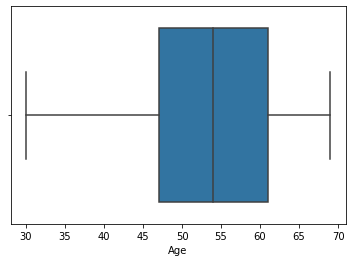

In [ ]:
#7.Create at least 2 visualizations that help the reader understand your dataset
#This is a box plot for age distribution
#The range of participant age is 30 to 69, with the majority falling under 46 to 61 years of age.
sns.boxplot(x=df['Age'])

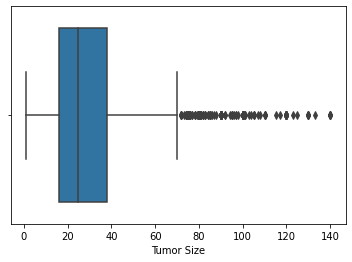

In [ ]:
#7. This is a box plot showing tumor size distribution.
#The median size of tumors is 25 millimeters. Most patients have tumors between 15 to 40 millimeters.
#There are many outliers beyond the normal range.
sns.boxplot(x=df['Tumor Size'])

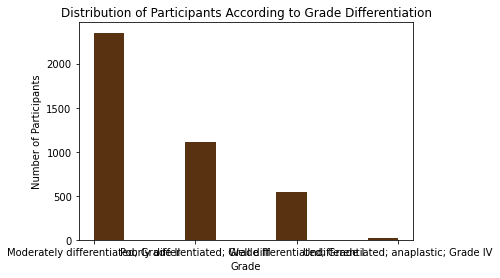

In [ ]:
#Histogram showing the frequency of cancer cell differentiation.
#Grading and differentiation codes of 1-4
plt.hist(df['Grade'], color='#593211')
plt.ylabel('Number of Participants')
plt.xlabel('Grade')
plt.title('Distribution of Participants According to Grade Differentiation')
plt.show()

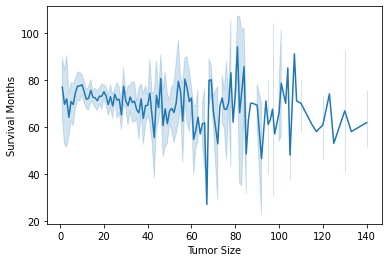

In [ ]:
#7.Line chart displaying the correlation between tumor size and survival months.
sns.lineplot(data=df, x="Tumor Size", y="Survival Months")

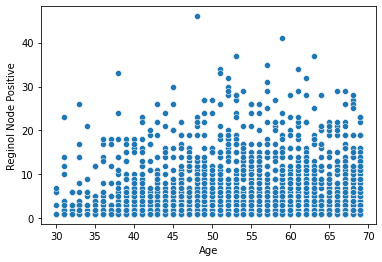

In [ ]:
sns.scatterplot(data=df, x="Age", y="Reginol Node Positive")

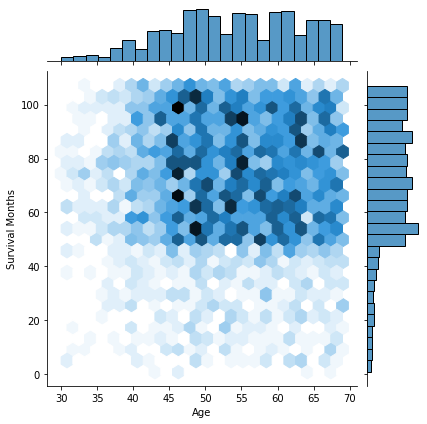

In [ ]:
#Joint plot displaying the correlation between age and survival months
with sns.axes_style():
    sns.jointplot(x="Age", y="Survival Months", data=df, kind='hex')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78fbf6950>]],
      dtype=object)

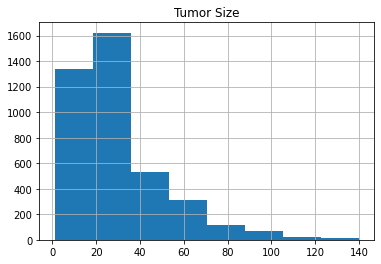

In [ ]:
df.hist('Tumor Size',bins=8)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78fb66350>]],
      dtype=object)

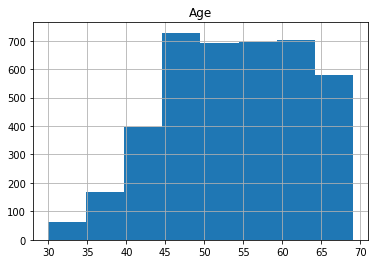

In [ ]:
df.hist('Age',bins=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78fb77550>]],
      dtype=object)

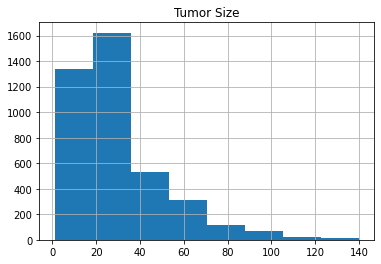

In [ ]:
df.hist('Tumor Size',bins=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78e4e4ed0>]],
      dtype=object)

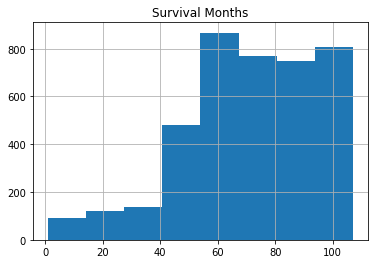

In [ ]:
df.hist('Survival Months',bins=8)

In [ ]:
#Interactive 3d scatter plot displaying correlations between age, tumor size and survival months.
fig = px.scatter_3d(df, x='Age', y='Tumor Size', z='Survival Months', color='Survival Months')
fig.show()